# **Análise de satisfação dos clientes que compram no e-commerce no Brasil.**

Manter os clientes satisfeitos é um desafio diário para qualquer empresa que queira se destacar no mercado. Oferecer um produto de qualidade já não é mais suficiente. O que os consumidores querem é ter suas expectativas superadas. A importância da satisfação do cliente é parte fundamental, pois ela é complementar com indicadores de lealdade, esforço e satisfação, e que em conjunto, formam a experiência do cliente, que será o principal diferencial competitivo das empresas daqui para frente.

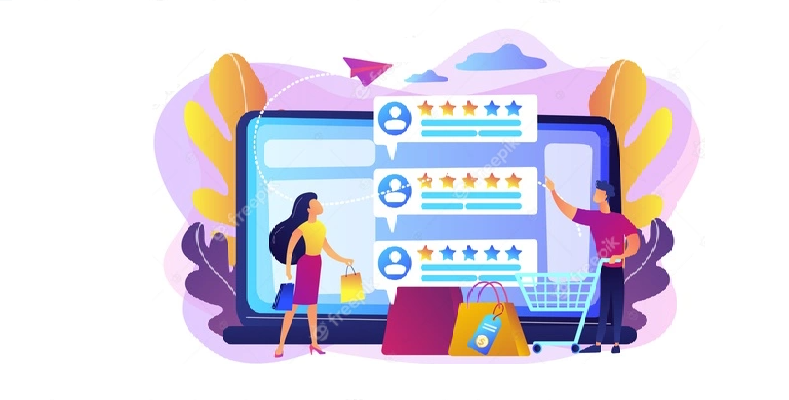


**Situação problema**
> Explorar estes dados e buscar insights sobre a satisfação dos
clientes que compram no e-commerce no Brasil.



## **Coleta dos dados**

As informações que vão alimentar nossa análise estão disponíveis [neste link](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv), foram extraídas do site Kaggle. Os dados são referentes as bases de dados á seguir:

In [ ]:
!pip install wordcloud -q

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [ ]:
itens_ordem = pd.read_csv('/content/olist_order_items_dataset.csv')
analise_pedidos = pd.read_csv('/content/olist_order_reviews_dataset.csv')
ordens = pd.read_csv('/content/olist_orders_dataset.csv')
produtos = pd.read_csv('/content/olist_products_dataset.csv')

## **Análise exploratória dos dados**

In [ ]:
display(itens_ordem)
itens_ordem.info()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
itens_ordem.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
display(analise_pedidos)
analise_pedidos.info()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
analise_pedidos.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
display(ordens)
ordens.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
ordens.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,aff4e35a92033577c37cf3a99f640cd9,084276e19165eb374ea209756511156a,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-06-19 18:47:51,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
display(produtos)
produtos.info()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
produtos.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Ao análisarmos todos esses dados a respeito das bases de dados usadas, observamos que as bases de dados estão bem carregadas de informações e que isso é um ponto muito bom para a análise.

## **Análise Exploratória**

Entender seu problema é fundamental. Assim, será possível orientar sua análise para resolver o problema. Então vamos lá!



> **Objetivo**: buscar insights sobre a satisfação dos
clientes



Para realizar algumas análises dos produtos mais vendidos, precisamos fazer a junção de duas bases de dados, que no caso será a *olist_order_items_dataset.csv* e a *olist_products_dataset.csv*.

In [ ]:
produtos_ordenados_juntos = pd.merge(itens_ordem, produtos)

In [ ]:
produtos_ordenados_juntos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


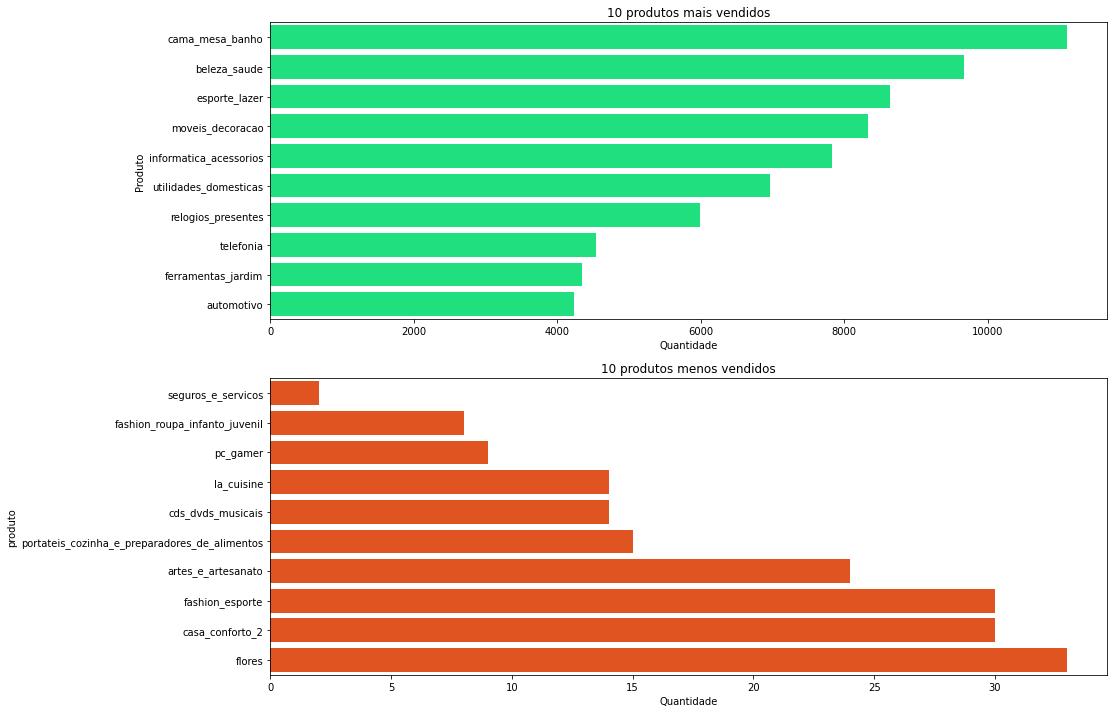

In [ ]:
produtos_mais_comprados = produtos_ordenados_juntos['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
produtos_menos_comprados = produtos_ordenados_juntos['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')


plt.figure(figsize = (15,12))

plt.subplot(211)
sns.barplot(data = produtos_mais_comprados, x = 'product_category_name', y = 'index', color = 'springgreen')
plt.title('10 produtos mais vendidos')
plt.xlabel('Quantidade')
plt.ylabel('Produto');


plt.subplot(212)
sns.barplot(data = produtos_menos_comprados, x = 'product_category_name', y = 'index', color = 'orangered')
plt.title('10 produtos menos vendidos')
plt.xlabel('Quantidade')
plt.ylabel('produto');



*   Os produtos de cama mesa e banho são os produtos mais pedidos pelos clientes, seguidos de produtos de beleza e produtos de esporte e lazer.
*   Os produtos menos comprados são os serviços de seguros, seguidos por roupas infanto juvenis e produtos de jogos para computadores.



Para realizar algumas análises dos produtos mais bem avaliados, precisamos fazer a junção de duas bases de dados, que no caso será a *produto_ordenados_juntos* e a *olist_order_reviews_dataset.csv*.

In [ ]:
review_produtos = pd.merge(produtos_ordenados_juntos, analise_pedidos)

Text(0, 0.5, 'Contagem de pedidos')

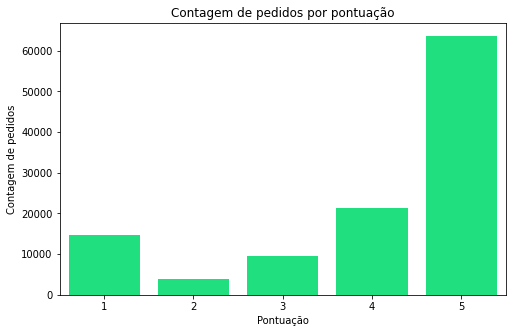

In [ ]:
media_produtos = review_produtos.groupby('product_category_name').mean()['review_score'].reset_index()

avaliacoes_altas = media_produtos.sort_values('review_score', ascending = False).nlargest(10,'review_score')
avaliacoes_baixas = media_produtos.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

plt.figure(figsize = (8,5))

sns.barplot(data = review_produtos.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = 'springgreen')
plt.title('Contagem de pedidos por pontuação')
plt.xlabel('Pontuação')
plt.ylabel('Contagem de pedidos')




Grande parte dos pedidos tem nota 5 de avaliação, isso é um bom indicador. Grande parte dos clientes estam satisfeitos com os pedidos.

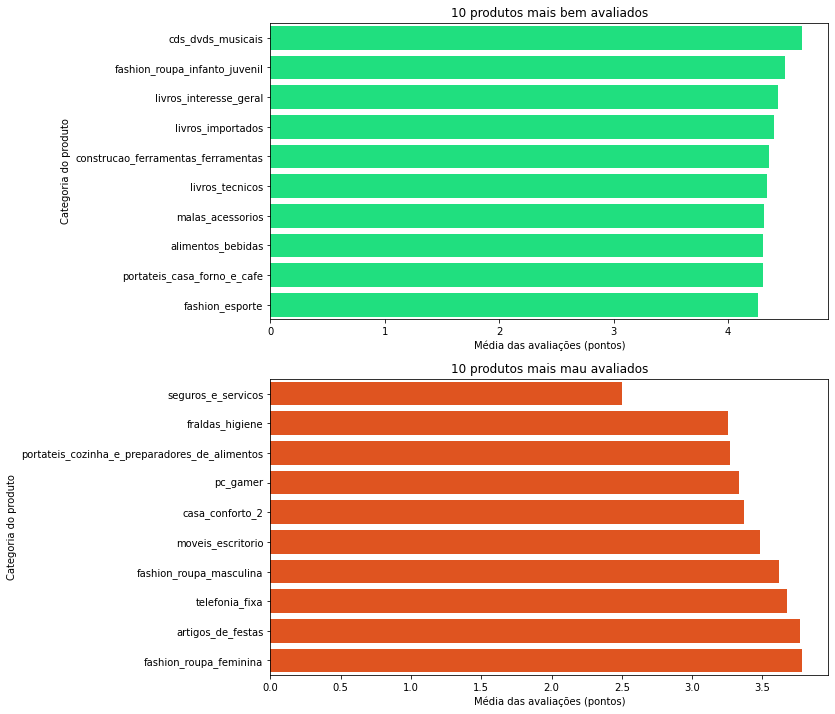

In [ ]:
plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = avaliacoes_altas, x = 'review_score', y = 'product_category_name', color = 'springgreen')
plt.title('10 produtos mais bem avaliados')
plt.xlabel('Média das avaliações (pontos)')
plt.ylabel('Categoria do produto');


plt.subplot(212)
sns.barplot(data = avaliacoes_baixas, x = 'review_score', y = 'product_category_name', color = 'orangered')
plt.title('10 produtos mais mau avaliados')
plt.xlabel('Média das avaliações (pontos)')
plt.ylabel('Categoria do produto');

**Categorias mais bem avaliadas**
*   Os produtos da categoria de cds, música e dvd obtiveram a maior média das avaliações.
*   Os produtos da categoria de roupas infantis. Como vimos na análise anterior as vendas dessa categoria é a segunda menos vendida, mas segundo os dados essa categoria obtêm boas críticas.
*   Vários tipos de livros estam com uma boa média nas avaliações. Isso pode sugerir os produtos de entretenimento em geral são bem avaliados.


*   As demais categorias apresentadas no gráfico estam na mesma faixa de pontos de avaliação.

**Categorias com avaliação negativa**


*   Os serviços de seguros possuem as piores classificações. É um ponto a se pensar, pode ser que as condições para se obter esse serviço não estam muito atraente.
*   A categoria fraldas com uma pontuação de cerca de 3,25, juntamente com cozinhas portáteis e produtos do tipo preparador de alimentos.


*   Os produtos de jogos para computador vêm em seguida, o que também é interessante porque são os que menos compram. Analisado mais detalhadamente precisa ser rensado essa categoria.

Quantidade de palavras: 152224


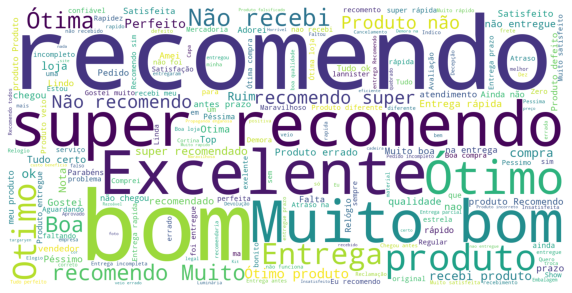

In [ ]:
# Armazenar todas as palavras da variável review_comment_title, que corresonde ao título do comentário
palavra = analise_pedidos.dropna(subset=['review_comment_title'], axis=0)['review_comment_title']

# Agrupar todas as palavras
todas_palavras = " ".join(s for s in palavra)

# Lista das palavras/artigo que não irão entrar na wordcloud
stopwords = set(STOPWORDS)
stopwords.update(['da', 'o', 'os', 'a', 'as', 'ao', 'das', 'dos', 'de'])

wordcloud = WordCloud(stopwords= stopwords,
                      background_color= 'white',
                      width=1600, height=800).generate(todas_palavras)


fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('wordcloud_imagem.png')

print('Quantidade de palavras: {}'.format(len(todas_palavras)))

Essa é uma wordcloud (nuvem de palavras), é uma lista hierarquizada visualmente. A wordcloud aplicada aos títulos das avaliações conseguimos ter uma noção do que as pessoas estão criticando negativamente e positivamente.

Quantidade de palavras: 2966075


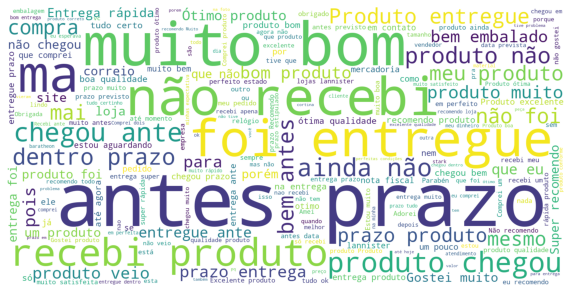

In [ ]:
# Armazenar todas as palavras da variável review_comment_message, que corresonde ao título do comentário
palavra = analise_pedidos.dropna(subset=['review_comment_message'], axis=0)['review_comment_message']

# Agrupar todas as palavras
todas_palavras = " ".join(s for s in palavra)

# Lista das palavras/artigo que não irão entrar na wordcloud
stopwords = set(STOPWORDS)
stopwords.update(['da', 'o', 'os', 'a', 'as', 'ao', 'das', 'dos', 'de'])

wordcloud = WordCloud(stopwords= stopwords,
                      background_color= 'white',
                      width=1600, height=800).generate(todas_palavras)


fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('wordcloud2_imagem.png')

print('Quantidade de palavras: {}'.format(len(todas_palavras)))

A wordcloud aplicada aos comentários das avaliações, conseguimos ter uma noção do que as pessoas estão falando a respeito dos produtos e serviços.

## **Conclusão**


A análise dos dados nos trouxe parâmetros para entender a opinião dos clientes, novos recursos podem ser criados a partir disso.O recurso gráfico das *wordclouds* nos dá uma boa métrica de opniões que se assemelha com a técnica de Net Promote Score que é uma metodologia de satisfação de clientes desenvolvida para avaliar o grau de fidelidade dos clientes. Lembrnado que o feedback negativo deve servir de aprendizado para sua empresa..

É preciso entender o que se passa na cabeça de seus clientes, qual a percepção que possuem do produto ou serviço oferecido por sua empresa e, principalmente, quais aspectos sua empresa precisa melhorar para garantir sua satisfação. Tão importante quando garantir um bom atendimento e qualidade nos produtos e serviços a cada um de seus clientes é criar motivos que o façam se manter fiel a sua empresa e continue fazendo negócios com você.